In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
movies = pd.read_csv('movie_metadata.csv')

In [4]:
movies = pd.DataFrame(movies)

In [5]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


*Vemos las variables contenidas en el dataset, su tipo y la cantidad de valores no nulos.*

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

*Veamos si hay películas duplicadas...*

In [7]:
movies[movies['movie_title'].duplicated()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000
395,Color,Rob Cohen,187.0,106.0,357.0,4000.0,Vin Diesel,23000.0,144512310.0,Action|Crime|Thriller,...,988.0,English,USA,PG-13,38000000.0,2001.0,14000.0,6.7,2.35,14000
590,Color,Brett Ratner,245.0,101.0,420.0,467.0,Rufus Sewell,12000.0,72660029.0,Action|Adventure,...,269.0,English,USA,PG-13,100000000.0,2014.0,3000.0,6.0,2.35,21000
656,Color,Paul Verhoeven,196.0,113.0,719.0,217.0,Rachel Ticotin,605.0,119412921.0,Action|Sci-Fi,...,391.0,English,USA,R,65000000.0,1990.0,308.0,7.5,1.85,0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
1122,Color,Pete Travis,432.0,95.0,38.0,20.0,Jason Cope,409.0,13401683.0,Action|Sci-Fi,...,588.0,English,UK,R,35000000.0,2012.0,107.0,7.1,2.35,46000


*Eliminamos los duplicados y guardamos el nuevo dataframe como cmovies.*

In [8]:
cmovies = movies.drop_duplicates(['movie_title'])

In [8]:
(cmovies['movie_title'].duplicated()).sum()

0

In [9]:
cmovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4917 entries, 0 to 5042
Data columns (total 28 columns):
color                        4898 non-null object
director_name                4815 non-null object
num_critic_for_reviews       4868 non-null float64
duration                     4902 non-null float64
director_facebook_likes      4815 non-null float64
actor_3_facebook_likes       4894 non-null float64
actor_2_name                 4904 non-null object
actor_1_facebook_likes       4910 non-null float64
gross                        4054 non-null float64
genres                       4917 non-null object
actor_1_name                 4910 non-null object
movie_title                  4917 non-null object
num_voted_users              4917 non-null int64
cast_total_facebook_likes    4917 non-null int64
actor_3_name                 4894 non-null object
facenumber_in_poster         4904 non-null float64
plot_keywords                4765 non-null object
movie_imdb_link              4917 non-

*Veamos otras variables categóricas y el tipo de datos que contienen por si pudieran ser útiles otros estudios más adelante.*

In [10]:
cmovies['color'].value_counts()

Color               4694
 Black and White     204
Name: color, dtype: int64

*Vemos como el valor ' Black and White' tiene un espacio en blanco antes de la letra B por lo que debemos tenerlo en cuenta al trabajar con esta variable o cambiarlo previamente para no tener que fijarnos en la ortografía.*

In [11]:
(cmovies['genres'].value_counts()).head(30) 

Drama                                        233
Comedy                                       205
Comedy|Drama                                 189
Comedy|Drama|Romance                         185
Comedy|Romance                               157
Drama|Romance                                150
Crime|Drama|Thriller                          98
Horror                                        67
Action|Crime|Drama|Thriller                   65
Drama|Thriller                                62
Action|Crime|Thriller                         62
Crime|Drama                                   62
Crime|Drama|Mystery|Thriller                  53
Horror|Thriller                               52
Documentary                                   51
Comedy|Crime                                  49
Action|Adventure|Sci-Fi                       48
Action|Adventure|Thriller                     44
Drama|Mystery|Thriller                        36
Biography|Drama                               35
Action|Adventure|Sci

*Esta clasificación por géneros resulta algo confusa puesto que muchos se repiten en distinto orden y algunas películas se definen como una mezcla de 3, 4 ó más géneros. Por ello vamos a unificar esta variable de cara a futuros análisis modificando esta columna e incluyendo únicamente el primer género incluido en la descripción de cada película.*

In [12]:
genre = []

for i in cmovies['genres']:
            genre.append(i.partition('|')[0])

In [13]:
cmovies['genres'] = genre

C:\Users\Alberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
cmovies['genres'].value_counts()

Comedy         1313
Action         1113
Drama           944
Adventure       439
Crime           340
Biography       250
Horror          222
Documentary      84
Animation        61
Fantasy          48
Mystery          32
Thriller         21
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Game-Show         1
Music             1
History           1
Film-Noir         1
Name: genres, dtype: int64

# Evolución de las producciones cinematográficas a lo largo del tiempo

Populating the interactive namespace from numpy and matplotlib


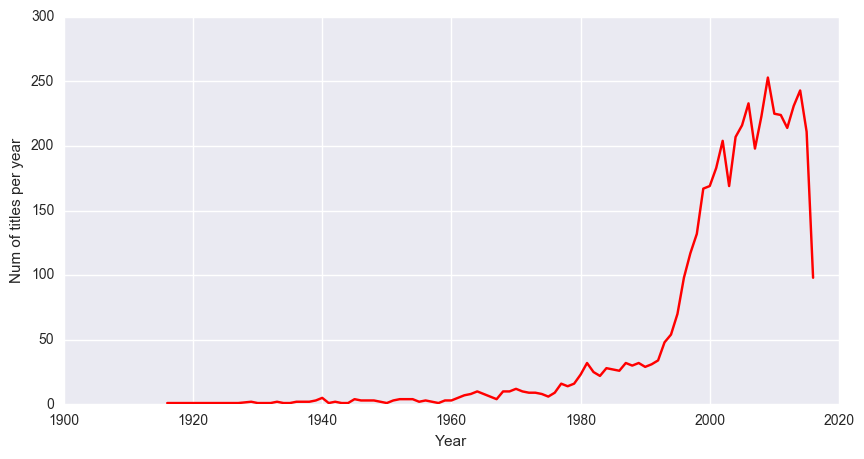

In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)
plt.plot((cmovies.groupby('title_year')['movie_title'].count()), 'r-')
plt.ylabel('Num of titles per year')
plt.xlabel('Year')

*A la luz de los datos, observamos como a partir de mediados de los 90s (1996) se alcanzó la cifra de casi 100 producciones por temporada y como, en cuestion de unos 6-8 años (2002-04), este número ya se había duplicado. En los últimos años, aunque con altibajos, la tendencia se podría definir como creciente según el gráfico.*

In [16]:
(cmovies.groupby('title_year')['movie_title'].count()).tail(30)

title_year
1987.0     32
1988.0     30
1989.0     32
1990.0     29
1991.0     31
1992.0     34
1993.0     48
1994.0     54
1995.0     70
1996.0     98
1997.0    117
1998.0    132
1999.0    167
2000.0    169
2001.0    183
2002.0    204
2003.0    169
2004.0    207
2005.0    216
2006.0    233
2007.0    198
2008.0    223
2009.0    253
2010.0    225
2011.0    224
2012.0    214
2013.0    231
2014.0    243
2015.0    211
2016.0     98
Name: movie_title, dtype: int64

# Color vs Black & White

*Utilizando esta variable categórica, veamos como se comportan algunas variables cuantitativas del dataset.*

**IMDB_score**

In [17]:
cmovies.groupby('color')['imdb_score'].mean()

color
 Black and White    7.216667
Color               6.405219
Name: imdb_score, dtype: float64

*Vemos como la media del IMDB score es en torno a 0.8 puntos superior en las películas en blanco y negro, siendo además, la calificación de éstas más robusta.*

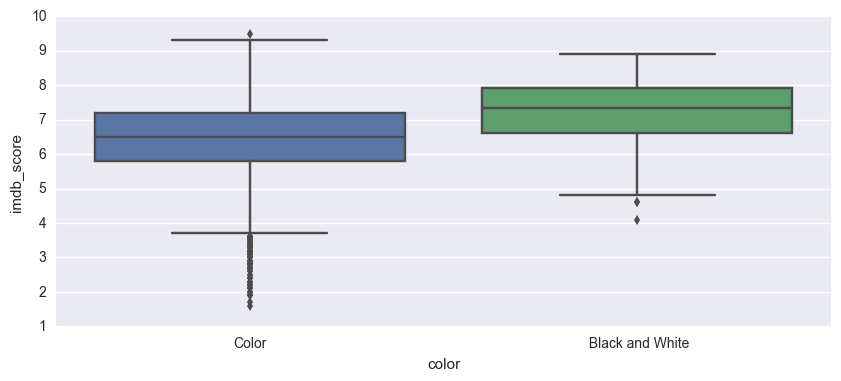

In [18]:
plt.figure(figsize = (10, 4))
sns.boxplot(x = 'color', y = 'imdb_score',  data = cmovies)

**Budget**

In [19]:
cmovies.groupby('color')['budget'].mean()

color
 Black and White    1.849525e+07
Color               3.742225e+07
Name: budget, dtype: float64

*Vemos que las películas a color, debido también al auge de la industria cinematográfica y las tecnologías disponibles, cuentan en media con un prespuesto que es el doble que el que se empleaba en las producciones en blanco y negro.*

# Genres

*Veamos a continuación cuáles son los géneros mejor valorados y aquéllos con mayor recaudación taquillera media. Dado que, al generar la nueva categoría 'géneros' aparecían algunos con muy pocas películas, aplicaremos un filtro para el caso del IMDB_score realizando los cálculos únicamente sobre aquéllos géneros que aglutinan al menos un total de 50 títulos para aumentar la consistencia del resultado.*

**IMDB_score**

In [20]:
cmovies.groupby('genres').size()

genres
Action         1113
Adventure       439
Animation        61
Biography       250
Comedy         1313
Crime           340
Documentary      84
Drama           944
Family           11
Fantasy          48
Film-Noir         1
Game-Show         1
History           1
Horror          222
Music             1
Musical           4
Mystery          32
Romance           6
Sci-Fi           13
Thriller         21
Western          12
dtype: int64

In [21]:
g = cmovies.groupby('genres').size()

In [22]:
g > 50

genres
Action          True
Adventure       True
Animation       True
Biography       True
Comedy          True
Crime           True
Documentary     True
Drama           True
Family         False
Fantasy        False
Film-Noir      False
Game-Show      False
History        False
Horror          True
Music          False
Musical        False
Mystery        False
Romance        False
Sci-Fi         False
Thriller       False
Western        False
dtype: bool

In [23]:
(cmovies.groupby('genres')['imdb_score'].mean()[g > 50]).sort_values(ascending=False)

genres
Documentary    7.167857
Biography      7.157600
Crime          6.902941
Drama          6.767161
Animation      6.631148
Adventure      6.530068
Action         6.231626
Comedy         6.194136
Horror         5.631081
Name: imdb_score, dtype: float64

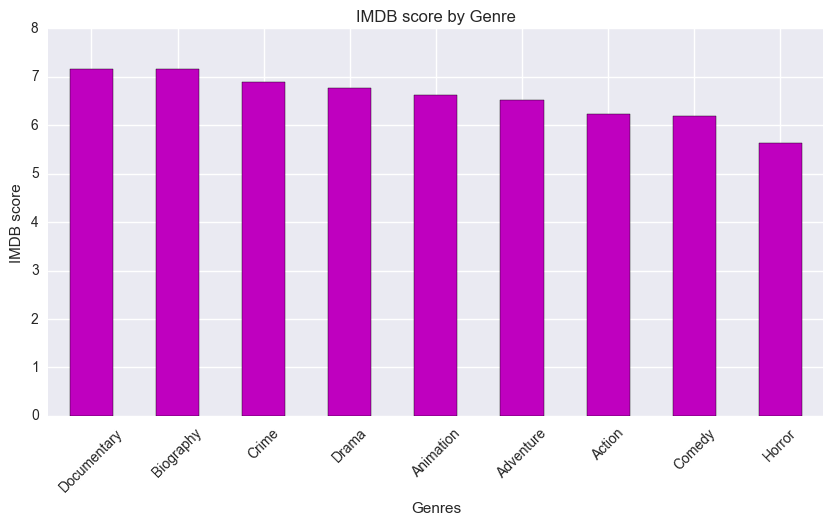

In [24]:
((cmovies.groupby('genres')['imdb_score'].mean()[g > 50]).sort_values(ascending=False)).plot(kind='bar', rot=45, color='m')
plt.ylabel('IMDB score')
plt.xlabel('Genres')
plt.title('IMDB score by Genre')

**Gross**

In [25]:
(cmovies.groupby('genres')['gross'].mean()).sort_values(ascending=False)

genres
Family         1.491605e+08
Animation      8.531406e+07
Adventure      8.403881e+07
Action         7.477887e+07
Musical        6.156660e+07
Mystery        4.904191e+07
Fantasy        3.719293e+07
Comedy         3.547292e+07
Horror         3.483644e+07
Biography      3.477012e+07
Crime          3.009926e+07
Drama          2.744983e+07
Sci-Fi         2.607184e+07
Romance        2.088634e+07
Western        1.199322e+07
Documentary    1.080287e+07
Music          3.419967e+06
Thriller       5.409697e+05
Film-Noir               NaN
Game-Show               NaN
History                 NaN
Name: gross, dtype: float64

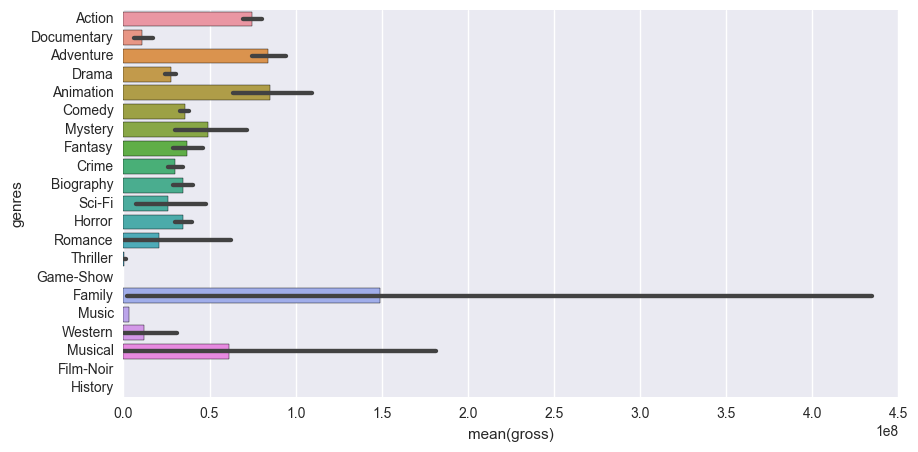

In [26]:
sns.barplot(x='gross', y='genres', data=cmovies)

# Películas y géneros más rentables

*Primer enfoque:*

*Entendidas como aquéllas que han generado una mayor recaudación por unidad de dinero invertido. Creamos la variable "profitability" en el dataframe a través de la cual relacionamos los ingresos (gross) con el coste/presupuesto (budget) y, agrupando por títulos, obtenemos aquéllas con los valores más altos.*

In [27]:
cmovies['profitability'] = cmovies['gross'] / cmovies['budget']
((cmovies.groupby('movie_title')['profitability'].sum()).sort_values(ascending = False)).head(20)

C:\Users\Alberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


movie_title
Paranormal Activity                 7194.485533
Tarnation                           2715.660550
The Blair Witch Project             2342.168567
The Brothers McMullen                409.864000
The Texas Chain Saw Massacre         369.427285
El Mariachi                          291.560000
The Gallows                          227.578190
Super Size Me                        177.374892
Halloween                            156.666667
American Graffiti                    148.005148
Rocky                                122.120049
In the Company of Men                114.264880
Napoleon Dynamite                    111.352390
Facing the Giants                    101.746630
Snow White and the Seven Dwarfs       92.462743
Benji                                 79.105200
My Date with Drew                     77.474545
The Circle                            67.378000
Fireproof                             66.902958
Open Water                            61.001764
Name: profitability, dtype: 

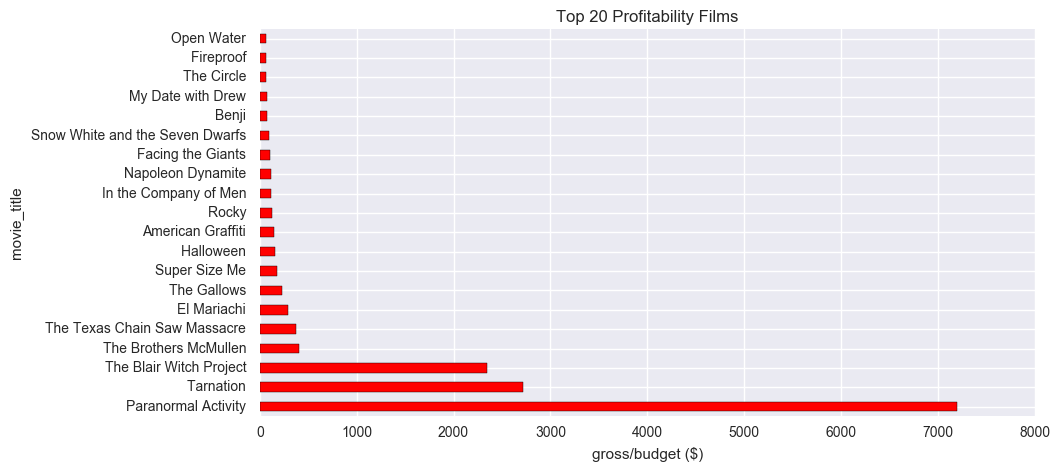

In [28]:
(((cmovies.groupby('movie_title')['profitability'].sum()).sort_values(ascending = False)).head(20)).plot(kind='barh', color='r')
plt.title('Top 20 Profitability Films')
plt.xlabel('gross/budget ($)')

*Y ahora por género...*

In [29]:
(cmovies.groupby('genres')['profitability'].mean()).sort_values(ascending = False)

genres
Horror         71.021679
Musical        18.817819
Biography      15.093892
Family         14.076490
Western         6.402978
Fantasy         5.457392
Documentary     5.415097
Animation       4.822085
Comedy          3.415401
Thriller        3.350345
Drama           2.800430
Adventure       2.203014
Romance         2.112690
Mystery         2.088861
Crime           1.991633
Action          1.802030
Sci-Fi          1.389223
Film-Noir            NaN
Game-Show            NaN
History              NaN
Music                NaN
Name: profitability, dtype: float64

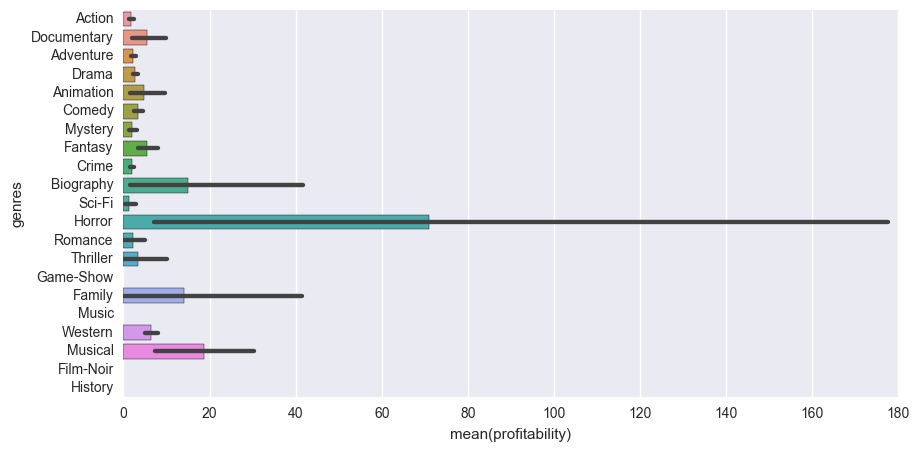

In [30]:
sns.barplot(x='profitability', y='genres', data=cmovies)

*Segundo enfoque:*

*En lugar de estudiar la relación unidad monetaria retornada vs invertida calcularemos el resultado de la diferencia entre el 'gross' generado en taquilla y el 'budget' empleado en producir la película y obtendremos el ranking.*

C:\Users\Alberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


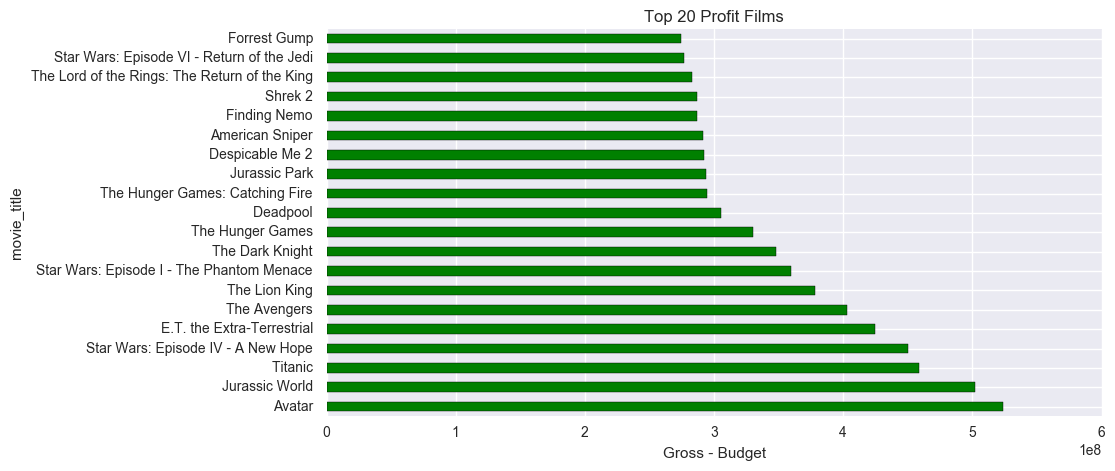

In [31]:
cmovies['g-b'] = cmovies['gross'] - cmovies['budget']
(((cmovies.groupby('movie_title')['g-b'].sum()).sort_values(ascending = False)).head(20)).plot(kind='barh', color='g')
plt.xlabel('Gross - Budget')
plt.title('Top 20 Profit Films')

*Y por género...*

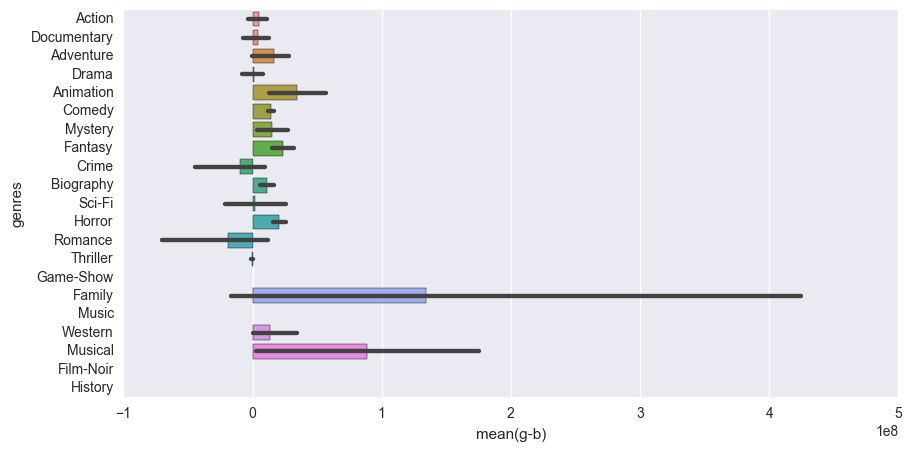

In [32]:
sns.barplot(x='g-b', y='genres', data=cmovies)

*Vemos como, en el primer enfoque, el género que más rentabilidad ofrecía por unidad de presupuesto era Horror mientras que, según el segundo, el que más beneficio reporta es el género familiar.*

# Directores

**Directores más prolíficos**

In [33]:
((cmovies.groupby('director_name')['movie_title'].count()).sort_values(ascending=False)).head(10)

director_name
Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Spike Lee            16
Ridley Scott         16
Renny Harlin         15
Steven Soderbergh    15
Oliver Stone         14
Tim Burton           14
Name: movie_title, dtype: int64

**Directores más recaudadores**

In [34]:
((cmovies.groupby('director_name')['gross'].sum()).sort_values(ascending=False)).head(10)

director_name
Steven Spielberg     4.114233e+09
Michael Bay          2.195444e+09
Peter Jackson        2.112884e+09
James Cameron        1.948126e+09
Christopher Nolan    1.813228e+09
George Lucas         1.741418e+09
Robert Zemeckis      1.619309e+09
Chris Columbus       1.618708e+09
Tim Burton           1.557079e+09
Sam Raimi            1.478116e+09
Name: gross, dtype: float64

**Directores mejor valorados**

*Nuevamente en este caso, realizaremos el cálculo entre aquellos directores que cuentan en su haber con más de 5 películas.*

In [35]:
d = cmovies.groupby('director_name').size()

In [36]:
((cmovies.groupby('director_name')['imdb_score'].mean()[d > 5]).sort_values(ascending=False)).head(10)

director_name
Christopher Nolan        8.425000
Quentin Tarantino        8.200000
Stanley Kubrick          8.050000
James Cameron            7.914286
Peter Jackson            7.888889
Alejandro G. Iñárritu    7.783333
David Fincher            7.750000
Martin Scorsese          7.660000
Wes Anderson             7.628571
Paul Greengrass          7.585714
Name: imdb_score, dtype: float64

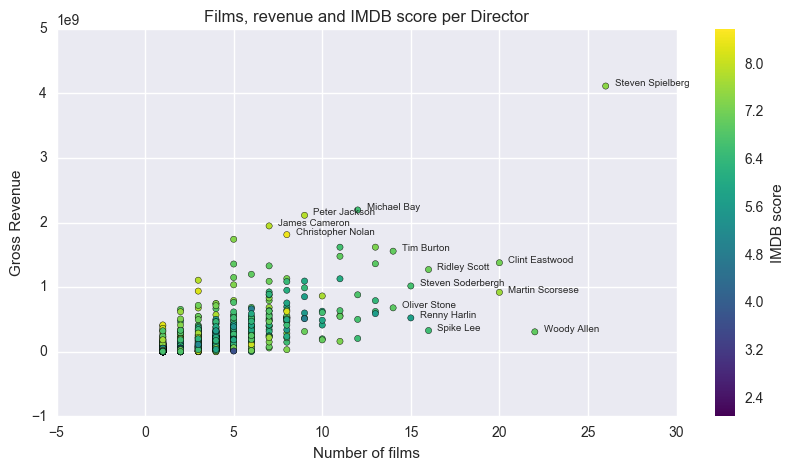

In [37]:
x = cmovies.groupby('director_name')['movie_title'].count()
y = cmovies.groupby('director_name')['gross'].sum()
z = cmovies.groupby('director_name')['imdb_score'].mean()

directors = pd.concat([x, y, z], axis=1)

plt.scatter(directors['movie_title'], directors['gross'], c=directors['imdb_score'], alpha=1, cmap='viridis')
plt.title('Films, revenue and IMDB score per Director')
plt.xlabel('Number of films')
plt.ylabel('Gross Revenue')
plt.colorbar().set_label('IMDB score') 

for d in range(len(directors)):
    if directors['movie_title'][d] > 13 or directors['gross'][d] > 1800000000:
        plt.annotate((directors.index)[d], xy=(directors['movie_title'][d], directors['gross'][d]), 
                 xytext=(directors['movie_title'][d] + 0.5, directors['gross'][d] + 0.1), fontsize=7)

# Actores protagonistas

**Actores protagonistas más prolíficos**

In [38]:
((cmovies.groupby('actor_1_name')['movie_title'].count()).sort_values(ascending=False)).head(25)

actor_1_name
Robert De Niro            48
Johnny Depp               36
Nicolas Cage              32
Denzel Washington         29
Matt Damon                29
J.K. Simmons              29
Bruce Willis              28
Steve Buscemi             27
Robin Williams            27
Harrison Ford             27
Liam Neeson               27
Robert Downey Jr.         26
Bill Murray               26
Jason Statham             25
Tom Cruise                24
Tom Hanks                 24
Morgan Freeman            23
Christian Bale            22
Gerard Butler             22
Kevin Spacey              22
Keanu Reeves              22
Anthony Hopkins           21
Leonardo DiCaprio         20
Philip Seymour Hoffman    20
Matthew McConaughey       20
Name: movie_title, dtype: int64

**Actores protagonistas y recaudación taquillera**

*Recaudación total*

In [39]:
((cmovies.groupby('actor_1_name')['gross'].sum()).sort_values(ascending=False)).head(10)

actor_1_name
Harrison Ford        3.391556e+09
Tom Hanks            3.264559e+09
Johnny Depp          3.249044e+09
Tom Cruise           2.907588e+09
Will Smith           2.762618e+09
Leonardo DiCaprio    2.495769e+09
Robert Downey Jr.    2.456990e+09
J.K. Simmons         2.376384e+09
Jennifer Lawrence    2.367856e+09
Robin Williams       2.297193e+09
Name: gross, dtype: float64

*Recaudación media por película para aquellos con más de 10 películas en su haber*

In [40]:
act = cmovies.groupby('actor_1_name').size()

In [41]:
((cmovies.groupby('actor_1_name')['gross'].mean()[act > 10]).sort_values(ascending=False)).head(10)

actor_1_name
Jennifer Lawrence    1.691326e+08
Chris Hemsworth      1.504181e+08
Will Smith           1.454009e+08
Tom Hanks            1.360233e+08
Harrison Ford        1.356622e+08
Bradley Cooper       1.275627e+08
Tom Cruise           1.264169e+08
Leonardo DiCaprio    1.247884e+08
Natalie Portman      1.077985e+08
Emma Stone           9.469658e+07
Name: gross, dtype: float64

**Actores protagonistas mejor valorados**

*IMDB score medio calculado para aquellos actores que han participado en más de 10 películas*

In [42]:
((cmovies.groupby('actor_1_name')['imdb_score'].mean()[act > 10]).sort_values(ascending=False)).head(10)

actor_1_name
Leonardo DiCaprio         7.505000
Tom Hanks                 7.425000
Clint Eastwood            7.337500
Tom Hardy                 7.309091
Christian Bale            7.250000
Philip Seymour Hoffman    7.240000
Harrison Ford             7.159259
Kevin Spacey              7.150000
Brad Pitt                 7.077778
Ryan Gosling              7.075000
Name: imdb_score, dtype: float64

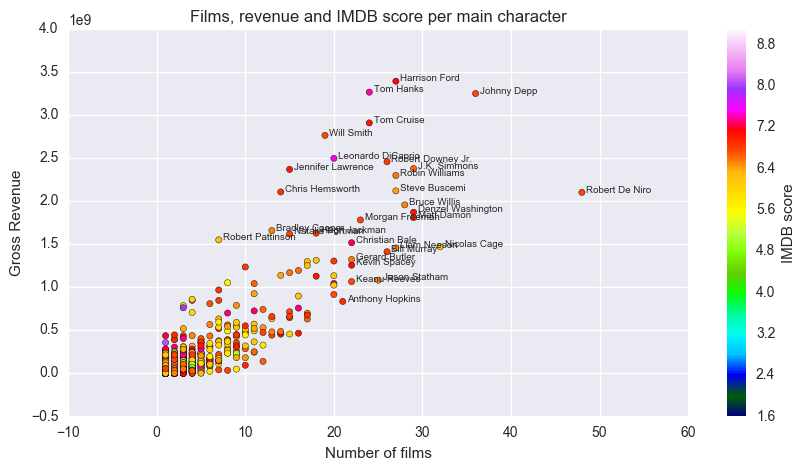

In [11]:
m = cmovies.groupby('actor_1_name')['movie_title'].count()
g = cmovies.groupby('actor_1_name')['gross'].sum()
s = cmovies.groupby('actor_1_name')['imdb_score'].mean()

actors = pd.concat([m, g, s], axis=1)

plt.scatter(actors['movie_title'], actors['gross'], c=actors['imdb_score'], alpha=1, cmap='gist_ncar')
plt.title('Films, revenue and IMDB score per main character')
plt.xlabel('Number of films')
plt.ylabel('Gross Revenue')
plt.colorbar().set_label('IMDB score') 

for d in range(len(actors)):
    if actors['movie_title'][d] > 20 or actors['gross'][d] > 1500000000:
        plt.annotate((actors.index)[d], xy=(actors['movie_title'][d], actors['gross'][d]), 
                    xytext=(actors['movie_title'][d] + 0.5, actors['gross'][d] + 0.5), fontsize=7)

# About Keywords

In [44]:
cmovies[['movie_title','plot_keywords']].head()

,movie_title,plot_keywords
0,Avatar,avatar|future|marine|native|paraplegic
1,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...
2,Spectre,bomb|espionage|sequel|spy|terrorist
3,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...
4,Star Wars: Episode VII - The Force Awakens ...,NaN


In [45]:
cmovies[['movie_title','plot_keywords']].tail()

,movie_title,plot_keywords
5038,Signed Sealed Delivered,fraud|postal worker|prison|theft|trial
5039,The Following,cult|fbi|hideout|prison escape|serial killer
5040,A Plague So Pleasant,NaN
5041,Shanghai Calling,NaN
5042,My Date with Drew,actress name in title|crush|date|four word tit...


In [46]:
type(cmovies['plot_keywords'][1]), type(str(cmovies['plot_keywords'][4])), type(cmovies['plot_keywords'][5041])

(str, str, float)

*Podemos apreciar como los keywords vienen todos ellos formando parte de un único string que no resulta útil para trabajar con ellos y como los NaN tienen formato float.*

In [47]:
len(cmovies)

4917

*Creamos una lista ("keywords") de strings con el valor de 'plot_keywords' de cada celda y otra lista ("descriptors") donde incluiremos la totalidad de los strings sin tener en cuenta la celda a la que pertenecen.*

In [48]:
keywords = []

for kw in cmovies['plot_keywords']: 
        keywords.append((str(kw)).split('|'))
    
descriptors = []

for group in keywords:
    for word in group:
        descriptors.append(word)
        
desc = pd.Series(descriptors)

In [49]:
len(cmovies), len(keywords)

(4917, 4917)

In [50]:
keywords[-5:]

[['fraud', 'postal worker', 'prison', 'theft', 'trial'],
 ['cult', 'fbi', 'hideout', 'prison escape', 'serial killer'],
 ['nan'],
 ['nan'],
 ['actress name in title', 'crush', 'date', 'four word title', 'video camera']]

In [51]:
descriptors[:6]

['avatar', 'future', 'marine', 'native', 'paraplegic', 'goddess']

In [52]:
len(desc)

23635

In [53]:
len(desc.unique())

8084

*La lista "descriptors" contiene 8084 valores únicos de los cuales representaremos los 25 que más apariciones acumulan en el dataset.*

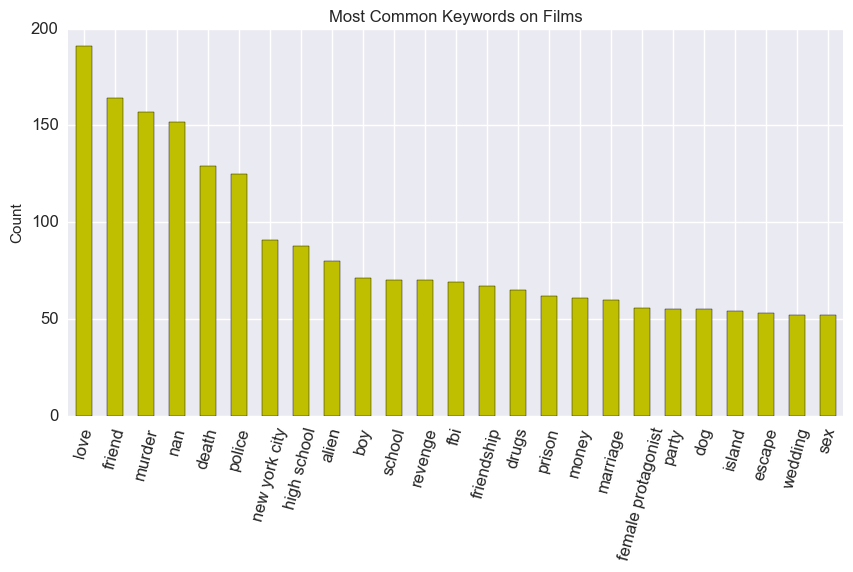

In [54]:
(desc.value_counts().head(25)).plot(kind='bar', rot=75, color='y', fontsize=12)
plt.title('Most Common Keywords on Films')
plt.ylabel('Count')

*Añadimos la lista "keywords" como una nueva columna del dataframe manteniendo los índices contenidos en cmovies.*

In [55]:
cmovies['keywords'] = pd.Series(keywords, index=cmovies.index)

C:\Users\Alberto\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
cmovies[['movie_title','keywords']].tail()

,movie_title,keywords
5038,Signed Sealed Delivered,"[fraud, postal worker, prison, theft, trial]"
5039,The Following,"[cult, fbi, hideout, prison escape, serial kil..."
5040,A Plague So Pleasant,[nan]
5041,Shanghai Calling,[nan]
5042,My Date with Drew,"[actress name in title, crush, date, four word..."


In [57]:
type(cmovies['keywords'][0])

list

**Un paso más allá aplicando el valor obtenido del listado de keywords sobre nuestro dataframe...**

In [58]:
(desc.value_counts().head(25)).index

Index([u'love', u'friend', u'murder', u'nan', u'death', u'police',
       u'new york city', u'high school', u'alien', u'boy', u'school',
       u'revenge', u'fbi', u'friendship', u'drugs', u'prison', u'money',
       u'marriage', u'female protagonist', u'party', u'dog', u'island',
       u'escape', u'wedding', u'sex'],
      dtype='object')

*Obtenemos el listado de keywords (top 25) más utilizados e iteraremos cada uno de ellos por las listas contenidas en las celdas de la nueva columna 'keywords'. Crearemos una máscara booleana para realizar cálculos sobre aquellas películas en cuya lista de keywords se encuentra contenida la palabra en cuestión.*

*En este caso vamos a ver la recaudación media asociada a cada keyword. Dado que un mismo film tiene varios keywords, debemos tener en cuenta que su recaudación puede aparecer de manera simultánea en el cálculo de la medias por keyword.*

In [59]:
gross_mean_by_keyword = []

for d in (desc.value_counts().head(25)).index:
    d_mask = []
    for kw_list in cmovies['keywords']:
        d_mask.append(d in kw_list) 
    gross_mean_by_keyword.append([d, cmovies[d_mask]['gross'].mean()])

In [60]:
gross_mean_by_keyword

[['love', 40054080.92682927],
 ['friend', 38121341.0],
 ['murder', 35811058.0],
 ['nan', 992059.0],
 ['death', 36381957.61111111],
 ['police', 39513527.828282826],
 ['new york city', 43653656.90243903],
 ['high school', 39467631.03947368],
 ['alien', 68804508.43661971],
 ['boy', 27860831.303030305],
 ['school', 41546758.54098361],
 ['revenge', 64241174.456140354],
 ['fbi', 48853493.390625],
 ['friendship', 36505219.3220339],
 ['drugs', 33475298.94642857],
 ['prison', 50472706.66071428],
 ['money', 31470675.296296295],
 ['marriage', 31097080.703703705],
 ['female protagonist', 32547105.744186047],
 ['party', 40128862.80434783],
 ['dog', 51506805.375],
 ['island', 62461794.41304348],
 ['escape', 57736218.04444444],
 ['wedding', 49920452.38297872],
 ['sex', 16067441.046511628]]

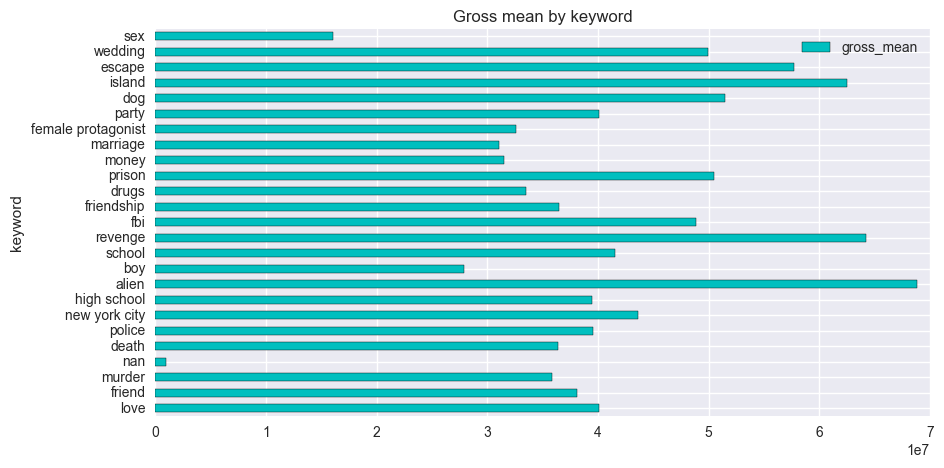

In [61]:
kw_gross = pd.DataFrame(gross_mean_by_keyword, columns=('keyword', 'gross_mean'))
kw_gross.set_index('keyword').plot(kind='barh', color='c')
plt.title('Gross mean by keyword')

*Sorprende la aparición en el top 5 de palabras tales como 'alien', 'revenge', 'island', 'escape' y 'dog'.*

*¿Ayudarían a un ingenioso guionista a crear una historia de las más taquilleras?...*

# Correlation Matrix

*Tras los análisis previos y para ver/descartar posibles relaciones entre las variables numéricas no analizadas vamos a generar un gráfico con la matriz de correlaciones.*

*Creamos un dataframe sólo con las variables númericas.*

In [62]:
var_num = cmovies.dtypes[cmovies.dtypes != 'object'].index
vn = cmovies[var_num]

In [63]:
vn.head(3)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profitability,g-b
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,3.208885,523505847.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,1.031347,9404152.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,0.816629,-44925825.0


*Realizamos el recuento de valores nulos y procedemos a eliminarlos.*

In [64]:
(vn.isnull()).sum()

num_critic_for_reviews         49
duration                       15
director_facebook_likes       102
actor_3_facebook_likes         23
actor_1_facebook_likes          7
gross                         863
num_voted_users                 0
cast_total_facebook_likes       0
facenumber_in_poster           13
num_user_for_reviews           21
budget                        484
title_year                    106
actor_2_facebook_likes         13
imdb_score                      0
aspect_ratio                  326
movie_facebook_likes            0
profitability                1128
g-b                          1128
dtype: int64

In [65]:
cvn = vn.dropna(how ='any' )

In [66]:
len(cvn)

3700

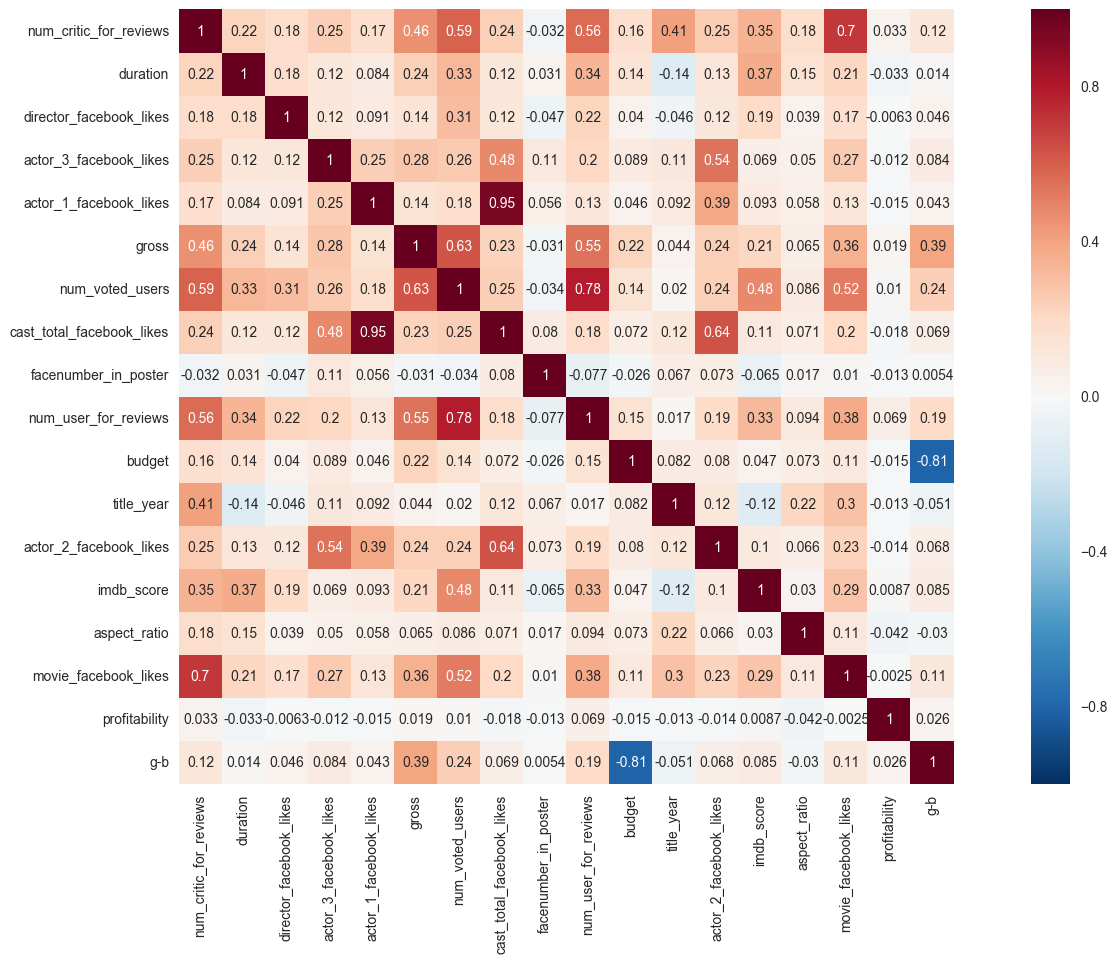

In [67]:
corr_matrix = cvn.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True)

*Podemos destacar como el cast_total_facebook_likes (likes de fb totales del elenco de la película) tiene una correlación muy fuerte (0.95) con actor_1_facebook_likes, es decir, depende fundamentalmente de los likes acumulados por el protagonista de la película.*

*El otror par de variables con cierta relevancia (-0.81) sería budget y g-b, pero no podemos tenerlo en cuenta puesto que ésta última es de elaboración propia y está relacionada de forma inversamente proporcional con la primera puesto que a mayor budget menor beneficio.*